# Pytorch

## Tensors

### Basics of torch.Tensor

In [1]:
import torch
array = torch.Tensor([0,1,2,3,4,5]) # 1D tesnor
array

tensor([0., 1., 2., 3., 4., 5.])

In [2]:
array[3] # access as a list

tensor(3.)

In [3]:
print("The dtype of tensor object is: ", array.dtype)
print("The type of tensor object is: ", array.type())

The dtype of tensor object is:  torch.float32
The type of tensor object is:  torch.FloatTensor


In [4]:
array_int = torch.IntTensor([2,3,2,5,4,3])
array_int

tensor([2, 3, 2, 5, 4, 3], dtype=torch.int32)

In [5]:
array_int.size()

torch.Size([6])

In [6]:
array.ndimension()

1

### Convert the dimension

In [7]:
col_array = array_int.view(6,1) # 6 row and 1 columns
col_array_b = array_int.view(-1,1) # if i do not know the numbers i just say all as -1

In [8]:
col_array_b

tensor([[2],
        [3],
        [2],
        [5],
        [4],
        [3]], dtype=torch.int32)

In [9]:
# alternatively we can also perform
col_array.view(3,2)

tensor([[2, 3],
        [2, 5],
        [4, 3]], dtype=torch.int32)

### Interact with np.array or pd.Series

In [10]:
import numpy as np
nparray= np.array([0,1,2,3,4,5])
torchtensor = torch.from_numpy(nparray) # torch.from_numpy
torchtensor

tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)

In [11]:
torchtensor.numpy() # obj.numpy

array([0, 1, 2, 3, 4, 5])

In [12]:
import pandas as pd
pandas_series = pd.Series([0,122,3,4]) 
pd_array = pandas_series.values # now is treated as numpy array
pd_to_torch = torch.from_numpy(pd_array)
pd_to_torch

tensor([  0, 122,   3,   4])

In [13]:
new_tensor = torch.tensor([1,2.3,4])
print(new_tensor[2])
# if we want as just a normal python number
new_tensor[2].item()

tensor(4.)


4.0

### Vector operation

#### Addiction

In [14]:
u = torch.tensor([1,0])
v = torch.tensor([0,1])
print(u+v)

tensor([1, 1])


#### Multiplication

In [15]:
u = torch.tensor([1,0]) 
u*2

tensor([2, 0])

#### Product of two vectors

In [16]:
u = torch.tensor([1,2])
v = torch.tensor([4,3])
u*v

tensor([4, 6])

#### Dot product

In [17]:
u = torch.tensor([1,2,4,2,1,3])
v = torch.tensor([4,3,3,2,5,4])
dot_result = torch.dot(u,v)
dot_result

tensor(43)

#### Broadcasting

In [18]:
u = torch.tensor([1,2,4,2,1,3])
u+10

tensor([11, 12, 14, 12, 11, 13])

#### Universal functions
This types of function are attributes of the obj Tensor!

In [19]:
u = torch.FloatTensor([1,2,4,2,1,3]) 
print(u.mean()) # mean only with FloatTensor  Obj.mean()
print(u.max())
print(u.var())
print(u.std())

tensor(2.1667)
tensor(4.)
tensor(1.3667)
tensor(1.1690)


### Linspace

In [20]:
torch.linspace(-2,2, 9) # from=-2, to=2, len= 9

tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])

Text(0.5, 1.0, 'Pi')

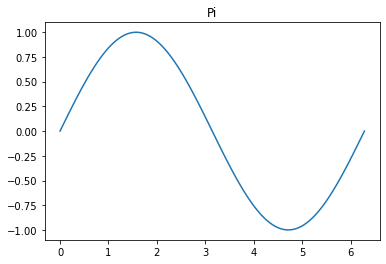

In [21]:
import matplotlib.pyplot as plt
x = torch.linspace(0,2*np.pi,100)
y=torch.sin(x)
plt.plot(x,y) 
plt.title("Pi")

### 2D Tensor

In [22]:
two_d = torch.tensor([[11,12,13],[21,22,23],[31,32,33]])
two_d

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])

In [23]:
print(two_d.ndimension()) #function
print(two_d.shape) #attribute

2
torch.Size([3, 3])


#### Indexing and slices

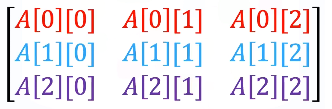

In [24]:
print(two_d)
print(two_d[0,0]) # in a similar way
print(two_d[0][0]) 
print(two_d[0, :])
print(two_d[:,0])

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
tensor(11)
tensor(11)
tensor([11, 12, 13])
tensor([11, 21, 31])


#### Operations

In [25]:
x = torch.tensor([[11,12,13],[21,22,23],[31,32,33]])
y = torch.tensor([[1,1,1],[1,1,1],[1,1,1]])
x+y

tensor([[12, 13, 14],
        [22, 23, 24],
        [32, 33, 34]])

In [26]:
(x * 2)

tensor([[22, 24, 26],
        [42, 44, 46],
        [62, 64, 66]])

In [27]:
x * y # just multiply by position!

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])

#### Matrix multiplaction

In [28]:
x = torch.tensor([[11,12,13],[21,22,23],[31,32,33]])
y = torch.tensor([[1],[1],[1]])
torch.matmul(x,y) == torch.mm(x,y)
torch.mm(x,y)

tensor([[36],
        [66],
        [96]])

### Derivatives

In [29]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2

In [30]:
# to calculate the derivative of y:
y.backward()
x.grad
# 4 is the derivate

tensor(4.)

In [32]:
x = torch.tensor(2.0, requires_grad=True)
z = (x**2) + (2*x) + 1 
z.backward()
x.grad

tensor(6.)

## Linear regression 

In [63]:
weigh = torch.tensor(2., requires_grad=True)
bias = torch.tensor(-1., requires_grad=True)
def model(x):
    y = weigh*x + bias
    return y
x = torch.tensor([12])
yhat=model(x)

### Linear class

In [68]:
from torch.nn import Linear
torch.manual_seed(42)
models = Linear(in_features=1, out_features=1) # empty model 

In [70]:
print(list(models.parameters())) # random parameters

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [74]:
models(torch.tensor([[0.],[1.]]))

tensor([[0.8300],
        [1.5945]], grad_fn=<AddmmBackward>)